In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e10/sample_submission.csv
/kaggle/input/playground-series-s5e10/train.csv
/kaggle/input/playground-series-s5e10/test.csv


In [29]:
!pip install pytorch-widedeep

INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 12.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 23.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━

In [2]:
!git clone https://github.com/FadQode/ds-kit.git

Cloning into 'ds-kit'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 6 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), done.


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Data Understanding

In [3]:
df_train = pd.read_csv("/kaggle/input/playground-series-s5e10/train.csv")
df_test = pd.read_csv("/kaggle/input/playground-series-s5e10/test.csv")

In [4]:
df_train.head(5)

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [5]:
df_test.head(5)

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


In [6]:
df_train.isna().sum()

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

In [7]:
df_test.isna().sum()

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [9]:
cat_columns = df_train.select_dtypes(include = ['object', 'boolean']).columns
for i in cat_columns:
    print(f"{i}: {df_train[i].unique()}")

road_type: ['urban' 'rural' 'highway']
lighting: ['daylight' 'dim' 'night']
weather: ['rainy' 'clear' 'foggy']
road_signs_present: [False  True]
public_road: [ True False]
time_of_day: ['afternoon' 'evening' 'morning']
holiday: [False  True]
school_season: [ True False]


In [10]:
num_columns = df_train.select_dtypes(include = ['float64', 'int64']).columns
num_columns

Index(['id', 'num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents',
       'accident_risk'],
      dtype='object')

In [11]:
def detect_outliers(df, series):
    series = df[series]
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return  lower_bound, upper_bound, Q1, Q3, IQR, series[(series < lower_bound) | (series > upper_bound)]

In [12]:
for i in num_columns:
    lower_bound, upper_bound, Q1, Q3, IQR, outliers = detect_outliers(df_train, i)
    outliers_count = outliers.count()
    outliers
    print(outliers_count)

    

0
0
0
0
2649
3367


# Data Preparation

## Exploratory Data Analysis

### Necessary Visualization

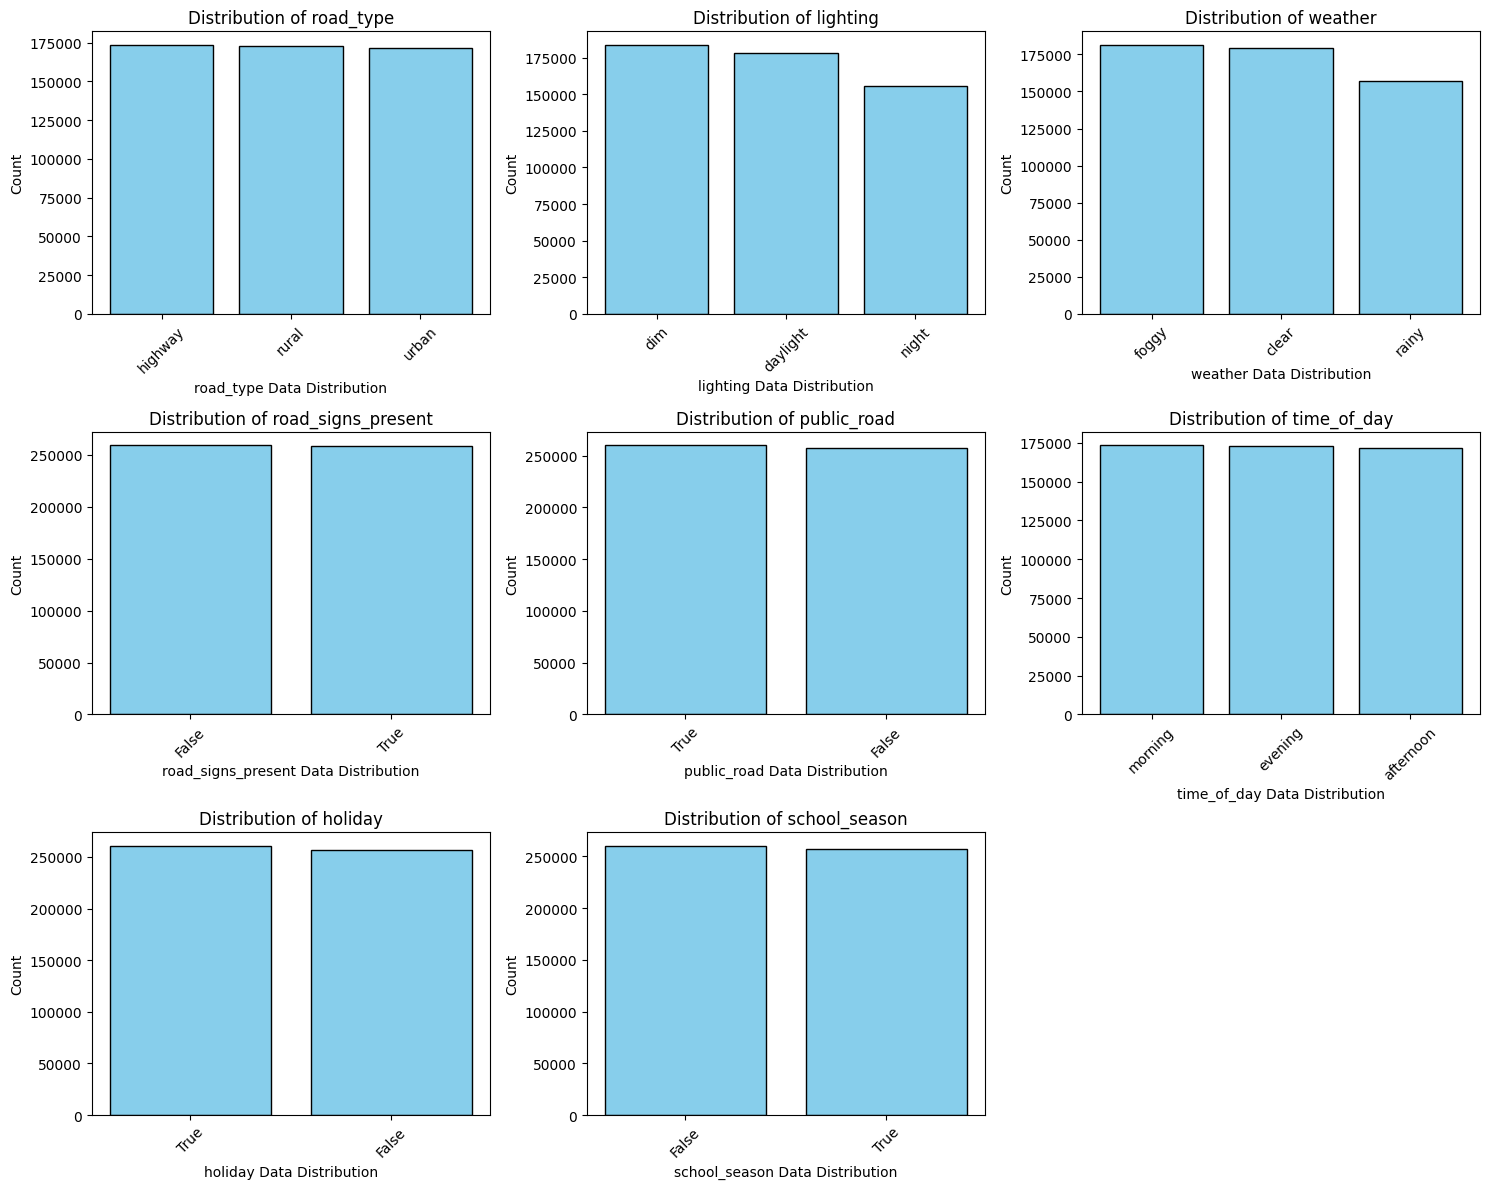

In [13]:
cat_plots = len(cat_columns)  
cols = 3  
rows = -(-cat_plots // cols)  
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))  
axes = axes.flatten()  

for idx, col in enumerate(cat_columns):
    data = df_train[col].value_counts(dropna=False)  
    axes[idx].bar(data.index.astype(str), data.values, color='skyblue', edgecolor='black')
    axes[idx].set_xlabel(f"{col} Data Distribution")
    axes[idx].set_ylabel("Count")
    axes[idx].set_title(f"Distribution of {col}")
    axes[idx].tick_params(axis='x', rotation=45) 

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

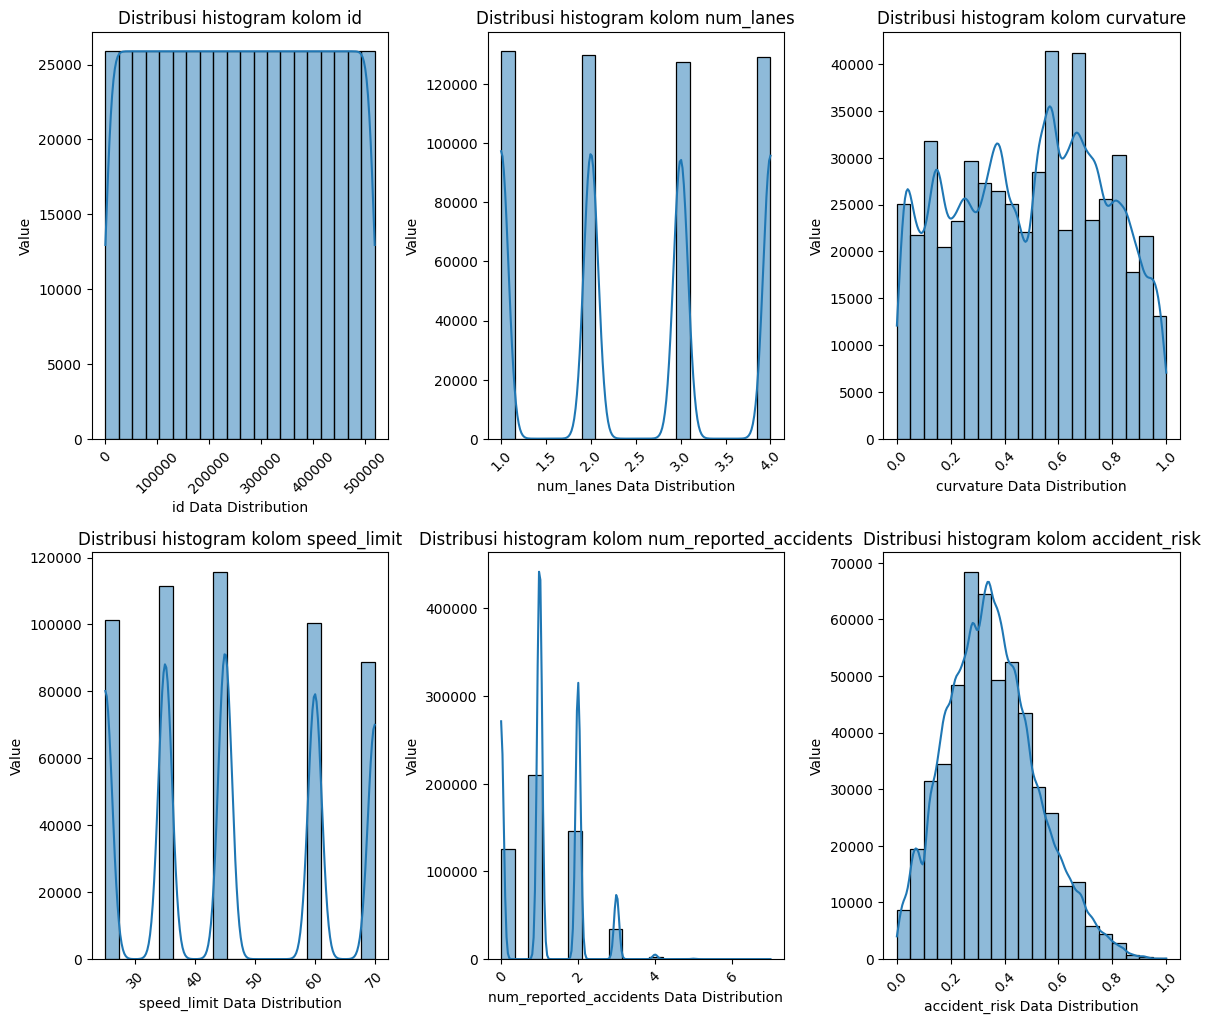

In [14]:


num_num_plots = len(num_columns)
num_cols = 3
num_rows = -(-num_num_plots // num_cols)
 
fig, axes = plt.subplots(rows, num_cols, figsize= (12, 15))
axes = axes.flatten()

if num_num_plots == 1:
    axes = [axes]

for idx, col in enumerate(num_columns):
    data = df_train[col]
    sns.histplot(x = data, ax=axes[idx], kde = True, bins = 20)
    axes[idx].set_title(f"Distribusi histogram kolom {col}")
    axes[idx].set_xlabel(f"{col} Data Distribution")
    axes[idx].set_ylabel(f"Value")
    axes[idx].tick_params(axis='x', rotation=45)

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()    
    

In [15]:
bins = range(0, 101, 10)  # Membuat interval 0–10, 11–20, dst
labels = [f"{i}-{i+9}%" for i in range(0, 100, 10)]

df_train['target_group'] = pd.cut(df_train['accident_risk'] * 100, bins=bins, labels=labels, include_lowest=True)

# Lihat hasil
print(df_train[['accident_risk', 'target_group']].head())

   accident_risk target_group
0           0.13       10-19%
1           0.35       30-39%
2           0.30       20-29%
3           0.21       20-29%
4           0.56       50-59%


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

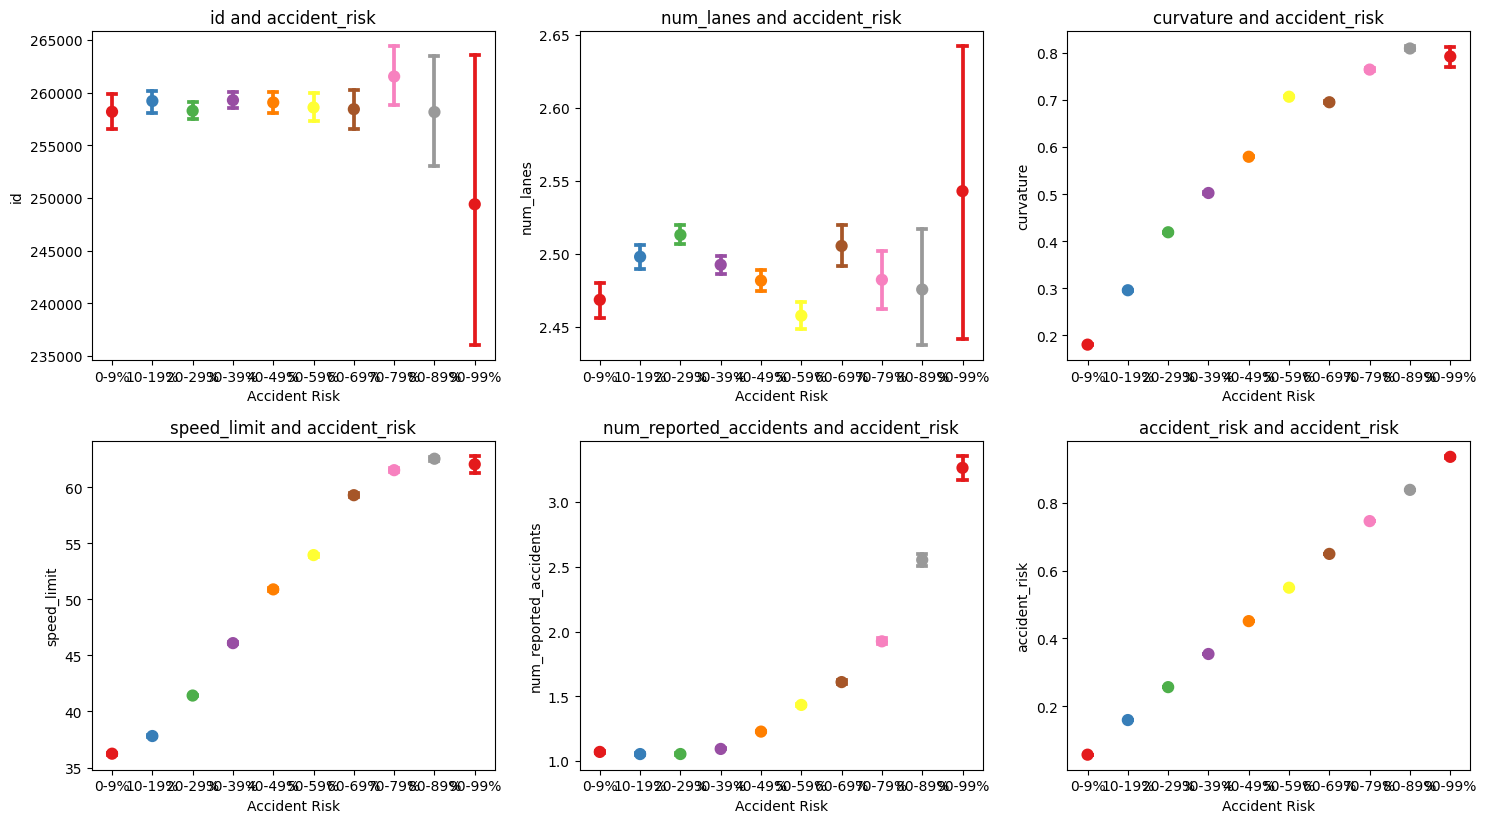

In [16]:
plt.figure(figsize = (15, 12))

ls_numerical_columns = num_columns
for i, col in enumerate(ls_numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.pointplot(x=df_train["target_group"], y=df_train[col], palette="Set1", capsize=0.2)
    plt.title(f'{col} and accident_risk')
    plt.xlabel("Accident Risk")
    plt.ylabel(col)
    
plt.tight_layout()
plt.show()

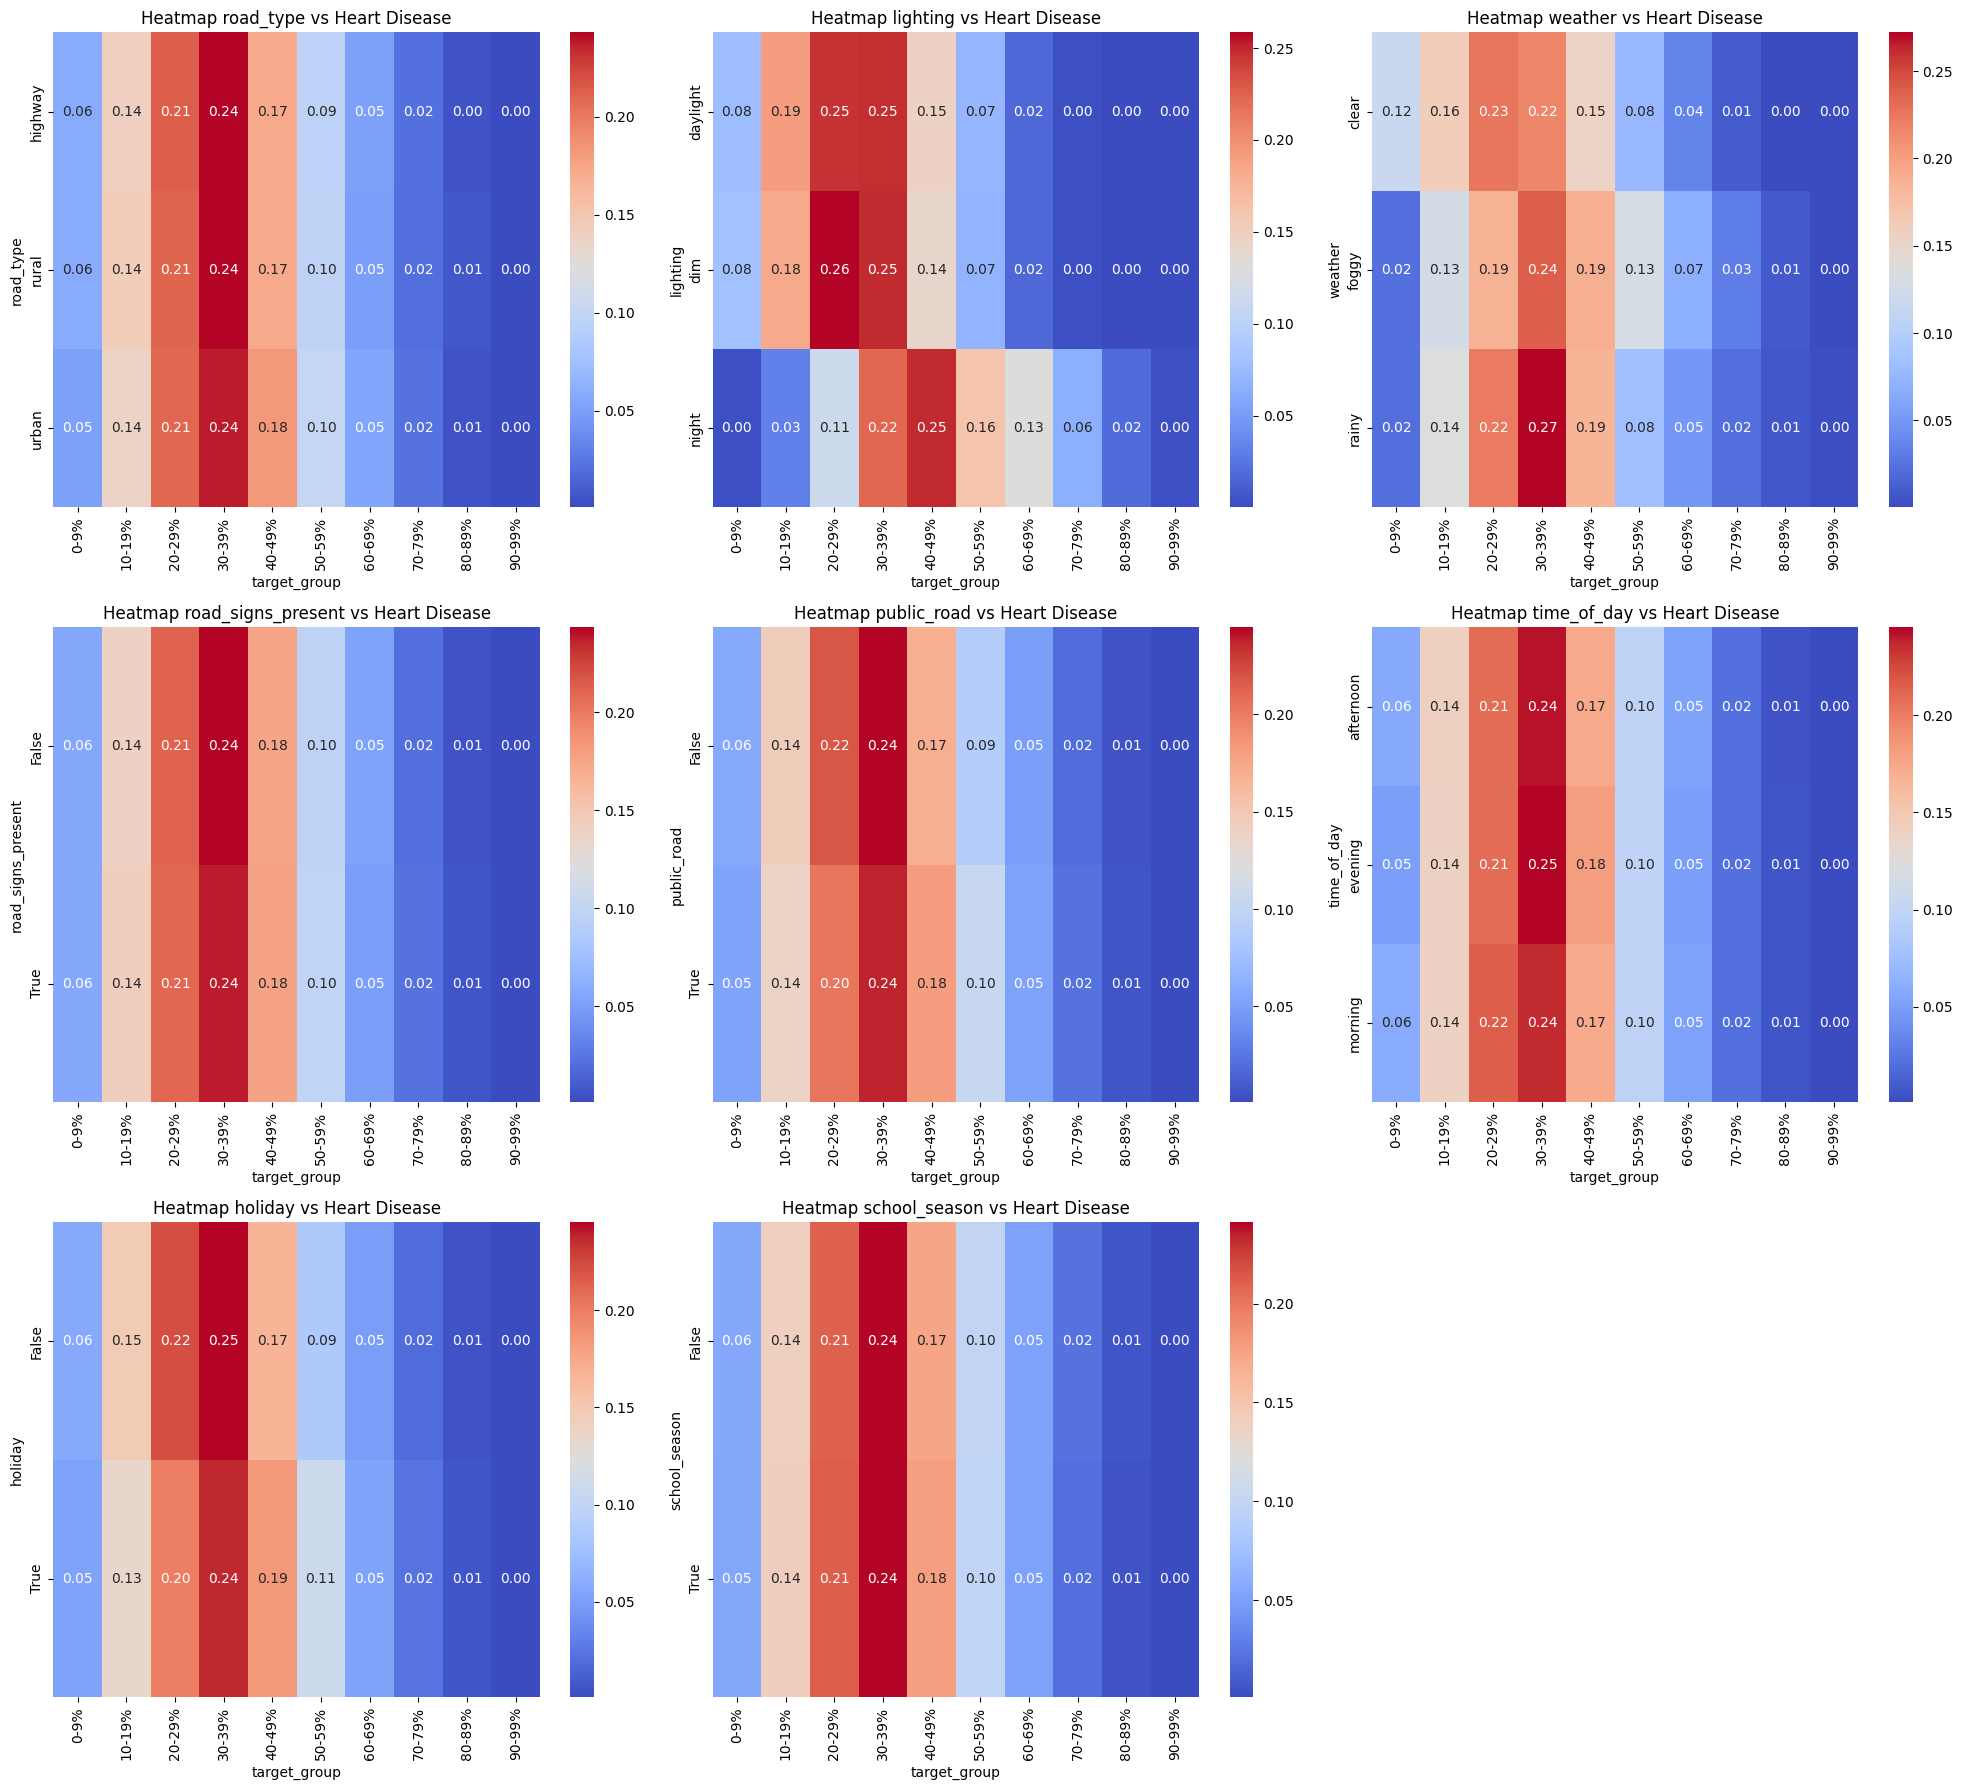

In [17]:
# Hitung jumlah kategori dan tentukan ukuran grid
num_features = len(cat_columns)
num_cols = 3  # Tambah kolom untuk menghindari terlalu banyak baris
num_rows = int(np.ceil(num_features / num_cols))

# Buat figure dan axes dengan ukuran lebih lebar
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))  # Diperbesar

# Pastikan axes dalam bentuk array 1D untuk iterasi mudah
axes = axes.flatten()

for i, col in enumerate(cat_columns):
    cross_tab = pd.crosstab(df_train[col], df_train["target_group"], normalize="index")
    sns.heatmap(cross_tab, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[i])
    axes[i].set_title(f"Heatmap {col} vs Heart Disease")

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):  
    fig.delaxes(axes[j])

plt.tight_layout()  # Supaya tampilan lebih rapi
plt.show()

In [18]:
df_train["target_group"].value_counts()

target_group
30-39%    124737
20-29%    109205
40-49%     91006
10-19%     72891
50-59%     50346
0-9%       28742
60-69%     26541
70-79%     10919
80-89%      2903
90-99%       464
Name: count, dtype: int64

### Correlation Check

In [19]:
def skew_val(series):
  return float(skew(series))

for i in num_columns:
    skewness = skew_val(df_train[i].dropna())
    print(f"\n skewness dari kolom {i}: {skewness} ")


 skewness dari kolom id: 7.582072697731494e-17 

 skewness dari kolom num_lanes: 0.012775295494575551 

 skewness dari kolom curvature: -0.038684421660551936 

 skewness dari kolom speed_limit: 0.1811592657350061 

 skewness dari kolom num_reported_accidents: 0.37396744366354484 

 skewness dari kolom accident_risk: 0.3784168800157989 


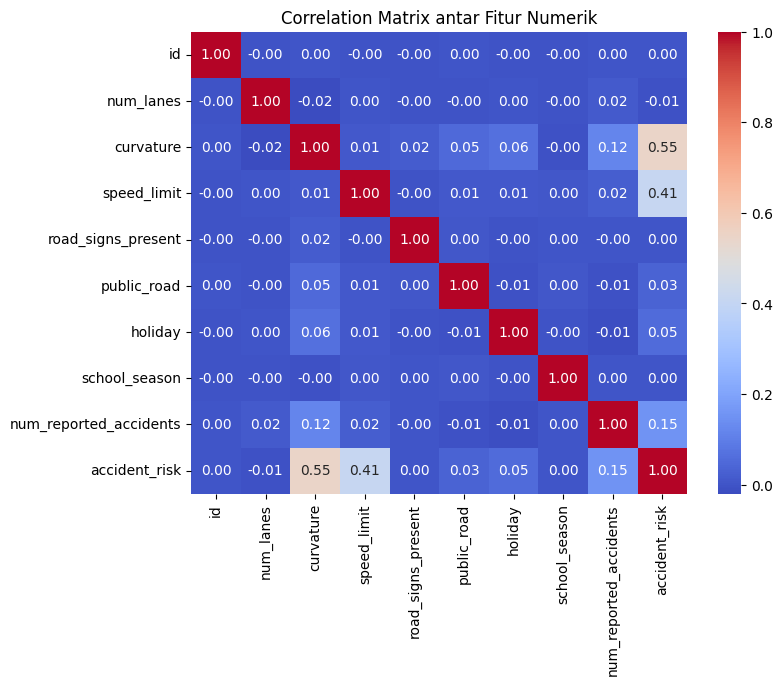

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasi Pearson (linear relationship)
corr = df_train.corr(numeric_only=True, method='spearman')

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix antar Fitur Numerik")
plt.show()

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

chi_square_results = {}

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

for col in cat_columns:
    # Buat tabel kontingensi
    cross_tab = pd.crosstab(df_train[col], df_train["target_group"])
    
    # Lakukan uji Chi-Square
    chi2, p, dof, expected = chi2_contingency(cross_tab)
    
    # Hitung Cramér’s V
    cv = cramers_v(cross_tab)
    
    # Simpan hasil
    chi_square_results[col] = {
        "Chi2 Score": chi2,
        "p-value": p,
        "Cramér’s V": cv
    }

# Tampilkan hasil
chi_square_df = pd.DataFrame(chi_square_results).T
chi_square_df = chi_square_df.sort_values(by="Chi2 Score", ascending=False)
print(chi_square_df)


                       Chi2 Score        p-value  Cramér’s V
lighting            111836.897537   0.000000e+00    0.328637
weather              30270.422445   0.000000e+00    0.170975
holiday               1759.258521   0.000000e+00    0.058291
public_road            685.377228  9.620017e-142    0.036383
road_type              380.890397   8.747326e-70    0.019179
time_of_day            276.336531   3.449310e-48    0.016336
road_signs_present      73.721292   2.824865e-12    0.011933
school_season           38.299012   1.540449e-05    0.008601


In [22]:
from sklearn.feature_selection import f_classif

X_num = df_train.select_dtypes(include=['int64', 'float64']).drop(columns=["accident_risk"])
y = df_train["accident_risk"].values

f_values, p_values = f_classif(X_num, y)

annova_results = pd.DataFrame({
    "Feature": X_num.columns,
    "F-Statistic": f_values,
    "p_value" : p_values,
}).sort_values(by="F-Statistic", ascending=False)

print("Annova Results Test: ")
annova_results

Annova Results Test: 


,Feature,F-Statistic,p_value
2,curvature,2442.780343,0.000000e+00
3,speed_limit,1304.346951,0.000000e+00
4,num_reported_accidents,399.910406,0.000000e+00
1,num_lanes,2.940495,2.067342e-20
0,id,0.904906,7.376671e-01


In [23]:
df_train.corrwith(df_train['accident_risk'], numeric_only=True).sort_values()

num_lanes                -0.006003
school_season            -0.000977
road_signs_present        0.000629
id                        0.000969
public_road               0.031032
holiday                   0.051129
num_reported_accidents    0.213891
speed_limit               0.430898
curvature                 0.543946
accident_risk             1.000000
dtype: float64

## Feature Engineering

In [24]:
# ss = StandardScaler()

# ss.fit_transform(X_num)


# Modeling

### Train-Test Split

In [25]:
X = df_train.drop(columns=["accident_risk","id", "target_group"])
y = df_train["accident_risk"] 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, 
)

## XGBoost

### Parameter Tuning

In [27]:
def category_format(df, cat_cols):
    """
    Ubah semua kolom dalam cat_cols menjadi tipe 'category' di DataFrame df.
    """
    for col in cat_cols:
        df[col] = df[col].astype("category")
    return df

In [28]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import optuna
import numpy as np

category_format(X, cat_columns)


# Definisi objective function untuk Optuna
def xgb_regression_trial(trial):
    param = {
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "random_state": 42
    }

    # Gunakan XGBRegressor (bukan Classifier)
    model = xgb.XGBRegressor(
        **param,
        tree_method="hist",  # lebih cepat di CPU
        objective="reg:squarederror",
        enable_categorical = True
    )

    # Gunakan scoring = "neg_mean_squared_error" untuk regresi
    score = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error").mean()
    
    # Karena nilai MSE negatif, kita return minus supaya Optuna meminimalkan MSE
    return -score

# Jalankan optimasi
study = optuna.create_study(direction="minimize")  # minimize MSE
study.optimize(xgb_regression_trial, n_trials=50)

print("Best params:", study.best_params)
print("Best MSE:", study.best_value)


[I 2025-10-14 09:16:41,572] A new study created in memory with name: no-name-d354cca8-12e0-481a-bb4b-d7a81a946780
[I 2025-10-14 09:16:50,758] Trial 0 finished with value: 0.0032979483766816127 and parameters: {'max_depth': 10, 'learning_rate': 0.10779987875664807, 'n_estimators': 618, 'subsample': 0.9494675699336421, 'colsample_bytree': 0.5338643124059637, 'min_child_weight': 3, 'gamma': 2.651247015025962, 'reg_alpha': 1.7587484615176003, 'reg_lambda': 0.4840035831417544}. Best is trial 0 with value: 0.0032979483766816127.
[I 2025-10-14 09:17:05,582] Trial 1 finished with value: 0.0031934872150476017 and parameters: {'max_depth': 8, 'learning_rate': 0.16823884461792749, 'n_estimators': 996, 'subsample': 0.680637473835171, 'colsample_bytree': 0.9456272167066125, 'min_child_weight': 2, 'gamma': 0.17088880423653474, 'reg_alpha': 3.4461578105564943, 'reg_lambda': 0.2577029012260784}. Best is trial 1 with value: 0.0031934872150476017.
[I 2025-10-14 09:17:12,301] Trial 2 finished with value:

KeyboardInterrupt: 

In [ ]:
best_param_xgboost = study.best_params

# Evaluation

In [ ]:
category_format(X_train, cat_columns)

for col in cat_columns:
    category_format(X, cat_columns)

model_xgb = xgb.XGBRegressor(
    **study.best_params,
    enable_categorical=True,
    tree_method="hist",
    objective="reg:squarederror",
    random_state=42,
    
)

model_xgb.fit(X_train, y_train)


In [ ]:
category_format(X_test, cat_columns)


y_pred = model_xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Evaluation on Test Set:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Inference

In [ ]:

category_format(df_test, cat_columns)

X_inf = df_test.drop(columns=["id"])
y_inf = model_xgb.predict(X_inf)


df_test["accident_risk_pred"] = y_inf
df_test[["id", "accident_risk_pred"]].to_csv("xgb_predictions.csv", index=False)
print("✅ Hasil prediksi berhasil disimpan ke 'xgb_predictions.csv'")